<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки-и-прочитаем-фреймы" data-toc-modified-id="Импортируем-библиотеки-и-прочитаем-фреймы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импортируем библиотеки и прочитаем фреймы</a></span></li><li><span><a href="#Посмотрим-на-корреляцию-признаков-с-таргетом" data-toc-modified-id="Посмотрим-на-корреляцию-признаков-с-таргетом-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Посмотрим на корреляцию признаков с таргетом</a></span></li><li><span><a href="#Далее-посмотрим-на-отдельные-показатели-и-постараемся-найти-различного-рода-зависимости" data-toc-modified-id="Далее-посмотрим-на-отдельные-показатели-и-постараемся-найти-различного-рода-зависимости-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Далее посмотрим на отдельные показатели и постараемся найти различного рода зависимости</a></span><ul class="toc-item"><li><span><a href="#Подведем-промежуточный-итог" data-toc-modified-id="Подведем-промежуточный-итог-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подведем промежуточный итог</a></span></li><li><span><a href="#Далее-также-можно-изучать-фрейм-в-разрезе-взаимодействия-пользователя-с-платформой." data-toc-modified-id="Далее-также-можно-изучать-фрейм-в-разрезе-взаимодействия-пользователя-с-платформой.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Далее также можно изучать фрейм в разрезе взаимодействия пользователя с платформой.</a></span></li></ul></li><li><span><a href="#Итог" data-toc-modified-id="Итог-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итог</a></span></li><li><span><a href="#Ознакомимся-с-фреймом-Вопросов" data-toc-modified-id="Ознакомимся-с-фреймом-Вопросов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ознакомимся с фреймом Вопросов</a></span></li><li><span><a href="#Ознакомимся-с-фреймом-Лекций" data-toc-modified-id="Ознакомимся-с-фреймом-Лекций-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ознакомимся с фреймом Лекций</a></span></li></ul></div>

# Изучение признаков фрейма - Riiid Answer Correctness Prediction
Track knowledge states of 1M+ students in the wild
## Импортируем библиотеки и прочитаем фреймы

In [1]:
# Импорт библиотек
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Описание колонок первого Фрейма данных
train_info = {'row_id': '(int64) Идентификационный код строки = ID code for the row',
              'timestamp': '(int64) время в миллисекундах между этим взаимодействием пользователя и завершением первого события от этого пользователя = the time in milliseconds between this user interaction and the first event completion from that user',
              "user_id": '(int32) Идентификационный код пользователя = ID code for the user.',
              'content_id': '(int16) Идентификационный код для взаимодействия с пользователем =  ID code for the user interaction',
              'content_type_id':  '0, если событием был вопрос, заданный пользователю, 1, если событием был пользователь, смотрящий лекцию. = (int8) 0 if the event was a question being posed to the user, 1 if the event was the user watching a lecture.',
              'task_container_id': '(int16) Идентификационный код пакета вопросов или лекций. Например, пользователь может просмотреть три вопроса подряд, прежде чем увидит пояснения к любому из них. Все эти три параметра будут иметь общий идентификатор task_container_id. = Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id.',
              'user_answer': '(int8) ответ пользователя на вопрос, если таковой имеется. Считайте -1 как null, для лекций. = the users answer to the question, if any. Read -1 as null, for lectures.',
              'answered_correctly': '(int8) если пользователь ответил правильно. Считайте -1 как null, для лекций. =  if the user responded correctly. Read -1 as null, for lectures.',
              'prior_question_elapsed_time': '(float32) Среднее время в миллисекундах, которое потребовалось пользователю, чтобы ответить на каждый вопрос из предыдущего набора вопросов, игнорируя все лекции между ними. Значение null для первого набора вопросов или лекции пользователя. Обратите внимание, что это среднее время, затраченное пользователем на решение каждого вопроса из предыдущего пакета. = The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between. Is null for a users first question bundle or lecture. Note that the time is the average time a user took to solve each question in the previous bundle.',
              'prior_question_had_explanation': '(bool) Независимо от того, видел ли пользователь объяснение и правильные ответы после ответа на предыдущий набор вопросов, игнорируя любые лекции между ними. Это значение используется в одном наборе вопросов и равно нулю для первого набора вопросов пользователя или лекции. Как правило, первые несколько вопросов, которые видит пользователь, были частью вступительного диагностического теста, на который он не получил никакой обратной связи. =  Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a users first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback.'}

In [3]:
def info_uniq_values(data: pd.DataFrame, info):
    col = ['str', 'object', 'boolean']
    for column in data.columns:
        if data[column].dtype not in col:
            #
            uniq_values_ = data[column].unique()
            uniq_ = len(uniq_values_)
            
            dubl_ = data[column].duplicated().sum()
            value_counts_ = data[column].value_counts().to_list()
            median_ = np.median(value_counts_)
            mean_ = np.mean(value_counts_)
            std_ = np.std(value_counts_)
            var_ = np.var(value_counts_)
            max_ = np.max(value_counts_)
            min_ = np.min(value_counts_)
            
            if uniq_<10:
                print(f"***")
                print(f"Поле: {column}: {info[column]}")
                print(f"Количество уникальных значений: {uniq_}")
                print(uniq_values_)
                print(f"Количество дублей в поле: {dubl_}")
                print(f'Количество повторений, уникальных значений {data[column].value_counts()} и соотношение:{data[column].value_counts(normalize=True)}')
            else:
                print(f"***")
                print(f"Поле: {column}: {info[column]}")
                print(f"Количество уникальных значений: {uniq_}")      
                print(f"Количество дублей в поле: {dubl_}")
                print(f"Среднее количество записей на уникальное значение: {data[column].count()/len(data[column].unique())}")
                print(f'Описание самого распредедления поля: {data[column].describe()}')
                print(f"Распределения уникальных: Значения медианы:{median_} и среднего:{mean_}, квантили 25%:{np.quantile(value_counts_,0.25)}, 75%: {np.quantile(value_counts_,0.75)}.")
                print(f"Распределения уникальных: Значения стандартного отклонения:{std_} и дисперсии:{var_}.")
                print(f"Распределения уникальных: Максимальное: {max_} и минимальное: {min_} значение")
                print()

def see_anomal(data):
    for x in data:
        boxplot = plt.boxplot(data[x].values)
        plt.close('all')
        outliers = list(boxplot["fliers"][0].get_data()[1])
        df_outliers = data[data[x].isin(outliers)] 
        print("Количество аномалий: ", len(df_outliers), "столбец:", x)         
        
def check_corr_method(data, method = 'pearson', num = -1):
    """
    Функция для расчета корреляции 'kendall','pearson','spearman' всех признаков с целевой переменной.
    ---
    Принимает на вход pd.DataFrame.
    Возвращает pd.Series с значением коэффициента корреляции для каждого признака.
    """
    # чекаем корреляцию с таргетом
    if num == 0:
        correlation = data.iloc[:, :].corrwith(data['target'], method=method)
    else:
        correlation = data.iloc[:, :-1].corrwith(data['target'], method=method)
    
    # сортируем
    correlation = correlation.sort_values(ascending=False)
    
    return correlation
    

In [4]:
# Импортируем самый большой файл
df_train = pd.read_csv('train.csv')

In [5]:
# Посмотрим общую информацию о фрейме
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99502668 entries, 0 to 99502667
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         float64
 3   content_id                      float64
 4   content_type_id                 float64
 5   task_container_id               float64
 6   user_answer                     float64
 7   answered_correctly              float64
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 7.4+ GB


In [6]:
# Посмотрим на дубликаты
df_train.duplicated().sum()

0

In [6]:
# Посмотрим первые 5 строк
df_train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115.0,5692.0,0.0,1.0,3.0,1.0,NaN,NaN
1,1,56943,115.0,5716.0,0.0,2.0,2.0,1.0,37000.0,False
2,2,118363,115.0,128.0,0.0,0.0,0.0,1.0,55000.0,False
3,3,131167,115.0,7860.0,0.0,3.0,0.0,1.0,19000.0,False
4,4,137965,115.0,7922.0,0.0,4.0,1.0,1.0,11000.0,False


In [7]:
# Ознакомимся с хвостом
df_train.tail()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
99502663,99502663,802709679,2.111604e+09,3181.0,0.0,428.0,2.0,1.0,27000.0,True
99502664,99502664,802709679,2.111604e+09,3180.0,0.0,428.0,2.0,0.0,27000.0,True
99502665,99502665,802709679,2.111604e+09,3182.0,0.0,428.0,3.0,1.0,27000.0,True
99502666,99502666,802855927,2.111604e+09,2731.0,0.0,429.0,0.0,1.0,23667.0,True
99502667,99502667,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Уберем последнюю запись с пропусками, так она не информативна.
df_train = df_train[:-1]

In [10]:
# Люде не компьютеры приведем к понятным величинам к секундам
# по сути срежем все до секунды т.к. скорость реакции человека около 1-2 секунд
df_train['timestamp'] = round(df_train['timestamp']/(1_000))
df_train['prior_question_elapsed_time'] = round(df_train['prior_question_elapsed_time']/(1_000))

In [11]:
# Посмотрим на содеражние пропусков
df_train.isna().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2312589
prior_question_had_explanation     385765
dtype: int64

In [12]:
# Заменим пустые ячейки -1 - данная заглушка хорошо показывает отсутствие положительного значения
df_train.fillna(-1)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0.0,1.150000e+02,5692.0,0.0,1.0,3.0,1.0,-1.0,-1
1,1,57.0,1.150000e+02,5716.0,0.0,2.0,2.0,1.0,37.0,False
2,2,118.0,1.150000e+02,128.0,0.0,0.0,0.0,1.0,55.0,False
3,3,131.0,1.150000e+02,7860.0,0.0,3.0,0.0,1.0,19.0,False
4,4,138.0,1.150000e+02,7922.0,0.0,4.0,1.0,1.0,11.0,False
...,...,...,...,...,...,...,...,...,...,...
99502662,99502662,802572.0,2.111604e+09,3206.0,0.0,427.0,3.0,1.0,32.0,True
99502663,99502663,802710.0,2.111604e+09,3181.0,0.0,428.0,2.0,1.0,27.0,True
99502664,99502664,802710.0,2.111604e+09,3180.0,0.0,428.0,2.0,0.0,27.0,True
99502665,99502665,802710.0,2.111604e+09,3182.0,0.0,428.0,3.0,1.0,27.0,True


In [13]:
# Сократим объем памяти на хранение данных
dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "int8",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8"}
df_train = df_train.astype(dtypes)
df_train['prior_question_had_explanation'] = df_train['prior_question_had_explanation'].astype(float).astype('Int64')

In [14]:
# Индекс совпадает со столбцом row_id
np.unique(df_train.index==df_train.row_id)

array([ True])

In [15]:
# Уберем лишний столбец
df_train.drop(columns=['row_id'], inplace=True, axis=1)

In [16]:
info_uniq_values(df_train, train_info)

***
Поле: timestamp: (int64) время в миллисекундах между этим взаимодействием пользователя и завершением первого события от этого пользователя = the time in milliseconds between this user interaction and the first event completion from that user
Количество уникальных значений: 23080532
Количество дублей в поле: 76422135
Среднее количество записей на уникальное значение: 4.311108036851143
Описание самого распредедления поля: count    9.950267e+07
mean     7.704483e+06
std      1.160290e+07
min      0.000000e+00
25%      5.238280e+05
50%      2.671070e+06
75%      9.924696e+06
max      8.742577e+07
Name: timestamp, dtype: float64
Распределения уникальных: Значения медианы:2.0 и среднего:4.311108036851143, квантили 25%:1.0, 75%: 4.0.
Распределения уникальных: Значения стандартного отклонения:96.26515468581009 и дисперсии:9266.980006682943.
Распределения уникальных: Максимальное: 389609 и минимальное: 1 значение

***
Поле: user_id: (int32) Идентификационный код пользователя = ID code for t

In [18]:
# Посмотрим на аномалии в данных
see_anomal(df_train[['timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time']])

Количество аномалий:  9336157 столбец: timestamp
Количество аномалий:  0 столбец: user_id
Количество аномалий:  1013861 столбец: content_id
Количество аномалий:  1926824 столбец: content_type_id
Количество аномалий:  9145707 столбец: task_container_id
Количество аномалий:  0 столбец: user_answer
Количество аномалий:  0 столбец: answered_correctly
Количество аномалий:  0 столбец: prior_question_elapsed_time


In [19]:
# Заменим название поля answered_correctly на 'target' - целевое поле
df_train.columns = ['timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'target',
       'prior_question_elapsed_time', 'prior_question_had_explanation']

In [21]:
# Поменяем местами колонки чтобы функции написанные мною , правильно отработали
df_train = df_train[['timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'prior_question_elapsed_time', 'prior_question_had_explanation', 'target']]

In [22]:
# Посмотрим на описание числовых данных
df_train.describe()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,prior_question_elapsed_time,prior_question_had_explanation,target
count,9.950267e+07,9.950267e+07,9.950267e+07,9.950267e+07,9.950267e+07,9.950267e+07,9.719008e+07,99116902.0,9.950267e+07
mean,7.704483e+06,1.058437e+09,5.219864e+03,1.936455e-02,9.033211e+02,1.376020e+00,2.542247e+01,0.889437,6.250990e-01
std,1.160290e+07,6.091820e+08,3.866522e+03,1.378026e-01,1.356299e+03,1.192914e+00,1.994589e+01,0.31359,5.225699e-01
min,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.0,-1.000000e+00
25%,5.238280e+05,5.325269e+08,2.063000e+03,0.000000e+00,1.050000e+02,0.000000e+00,1.600000e+01,1.0,0.000000e+00
50%,2.671070e+06,1.053950e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,2.100000e+01,1.0,1.000000e+00
75%,9.924696e+06,1.587911e+09,7.425000e+03,0.000000e+00,1.093000e+03,3.000000e+00,3.000000e+01,1.0,1.000000e+00
max,8.742577e+07,2.111604e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,3.000000e+02,1.0,1.000000e+00


Подобное описание дает общие сведения количественных показателях, но не очень информативно и полезно для установления истинных закономерностей.

In [ ]:
# Посмотрим общую информацию о фрейме
df_train.info()

array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'content_id'}>],
       [<Axes: title={'center': 'content_type_id'}>,
        <Axes: title={'center': 'task_container_id'}>,
        <Axes: title={'center': 'user_answer'}>],
       [<Axes: title={'center': 'prior_question_elapsed_time'}>,
        <Axes: title={'center': 'prior_question_had_explanation'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

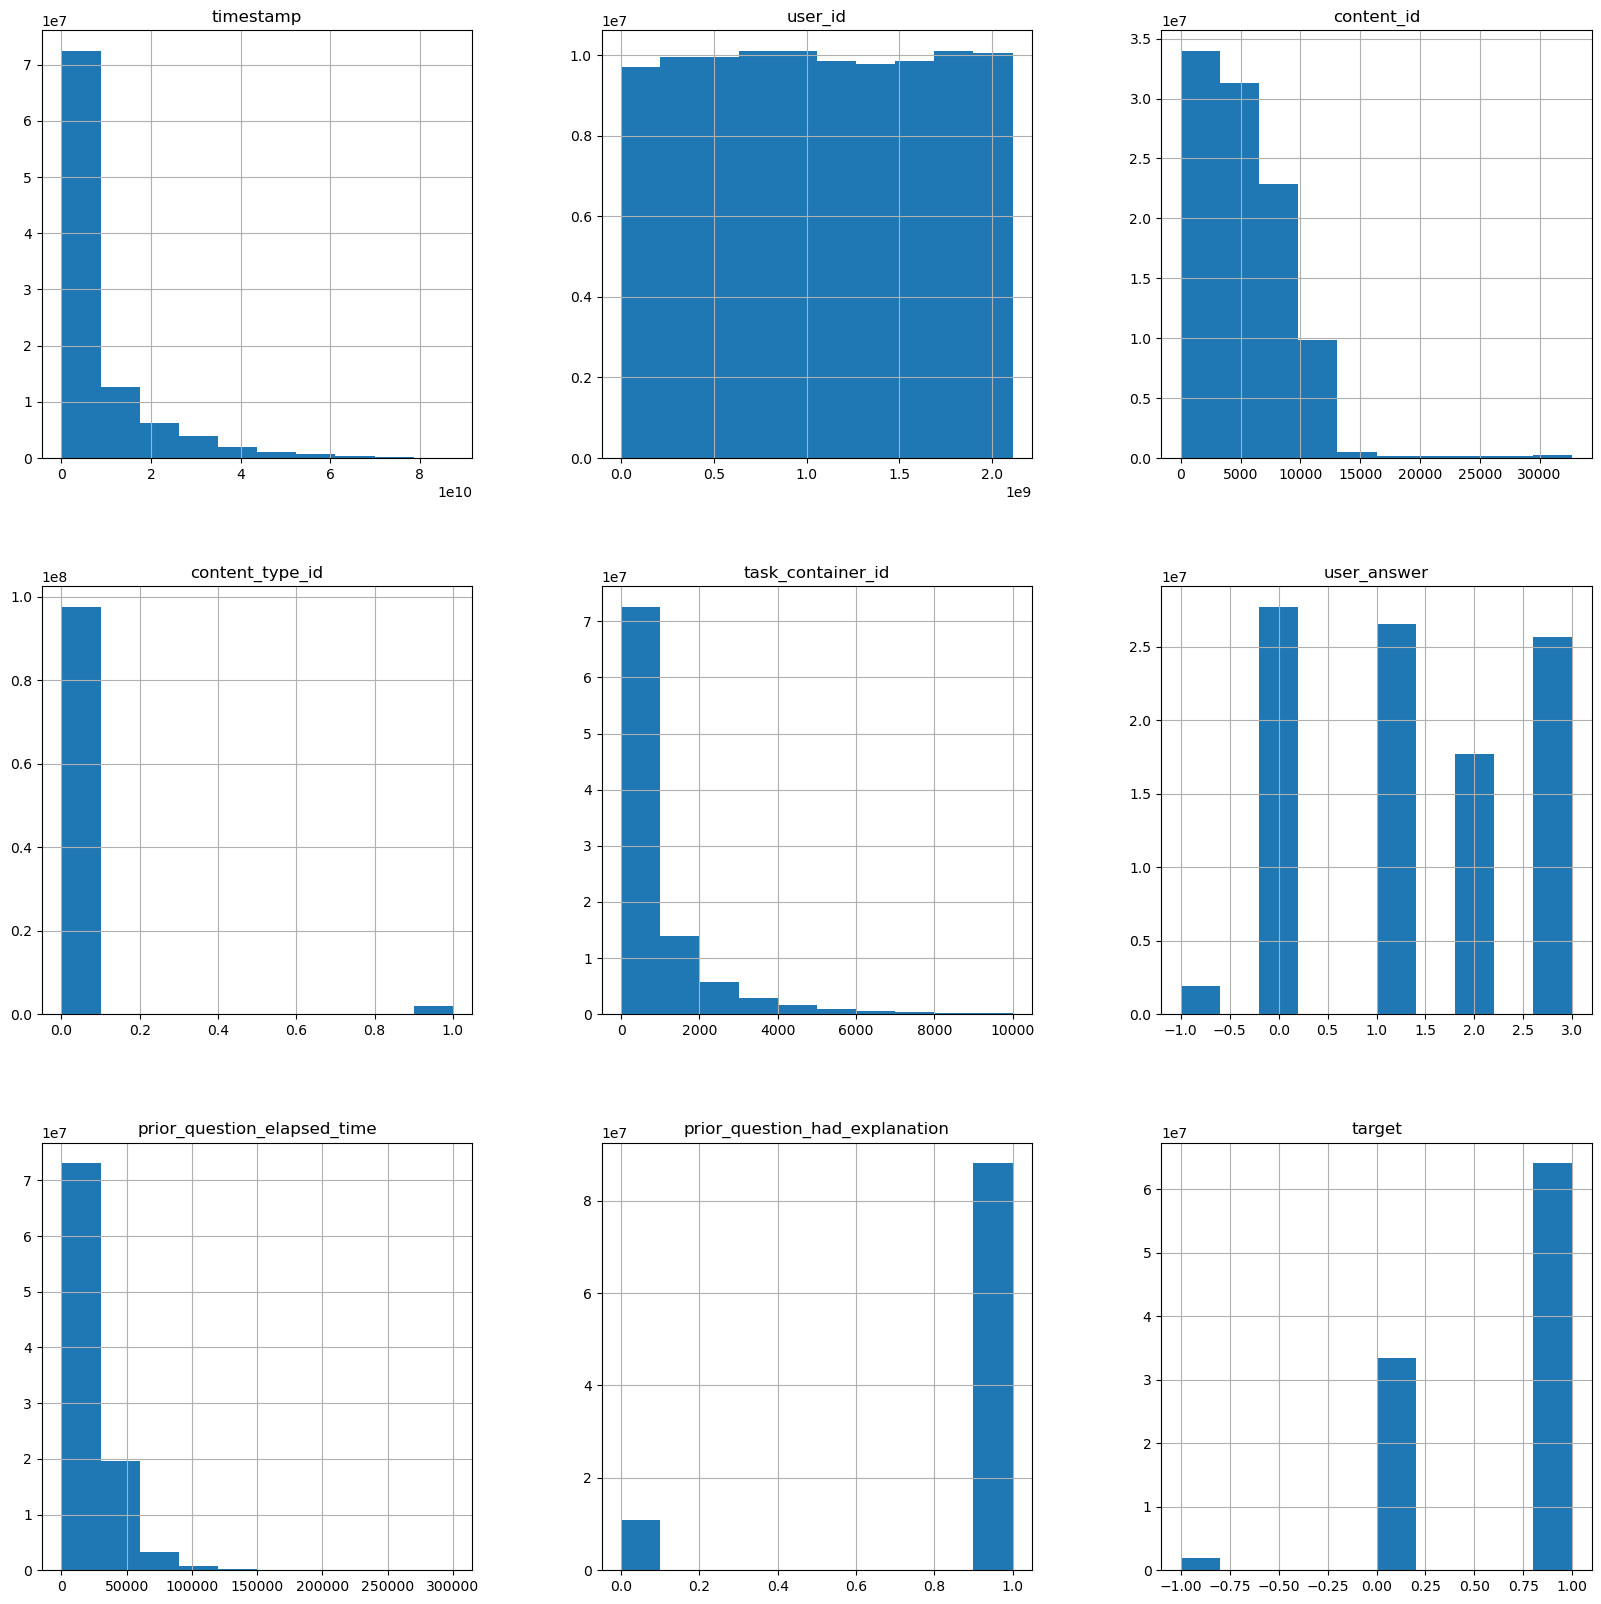

In [29]:
df_train.hist(figsize=(20,20))
    

## Посмотрим на корреляцию признаков с таргетом

In [26]:
check_corr_method(df_train, 'spearman')

prior_question_had_explanation    0.207295
task_container_id                 0.086602
user_answer                       0.074863
timestamp                         0.055629
user_id                          -0.000574
prior_question_elapsed_time      -0.005285
content_id                       -0.071767
content_type_id                  -0.286440
dtype: float64

In [27]:
check_corr_method(df_train, 'kendall')

C:\Users\ipd08\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5283: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


prior_question_had_explanation    0.205435
task_container_id                 0.069959
user_answer                       0.067642
timestamp                         0.044972
user_id                          -0.000464
prior_question_elapsed_time      -0.004358
content_id                       -0.058353
content_type_id                  -0.283879
dtype: float64

In [30]:
check_corr_method(df_train)

prior_question_had_explanation    0.207295
task_container_id                 0.086602
user_answer                       0.074863
timestamp                         0.055629
user_id                          -0.000574
prior_question_elapsed_time      -0.005285
content_id                       -0.071767
content_type_id                  -0.286440
dtype: float64

In [18]:
# Количество уникальных пользователей 
print(f"Количество уникальных пользователей: {len(df_train['user_id'].unique())}")
print(f"Количество дублей user_id в поле: {df_train['user_id'].duplicated().sum()}")
print(f"Среднее количество записей в ДатаФрейме на одного пользователя: {df_train['user_id'].count()/len(df_train['user_id'].unique())}")

Количество уникальных пользователей: 386895
Количество дублей user_id в поле: 99115772
Среднее количество записей в ДатаФрейме на одного пользователя: 257.1826128536166
Максимальное 17917 и минимальное 1 количество взаимдействий пользователя


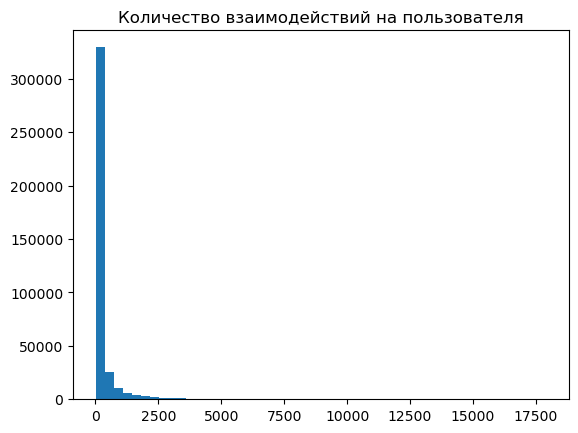

In [19]:
plt.hist(df_train['user_id'].value_counts().to_list(), bins=50)
plt.title('Количество взаимодействий на пользователя')
plt.show();

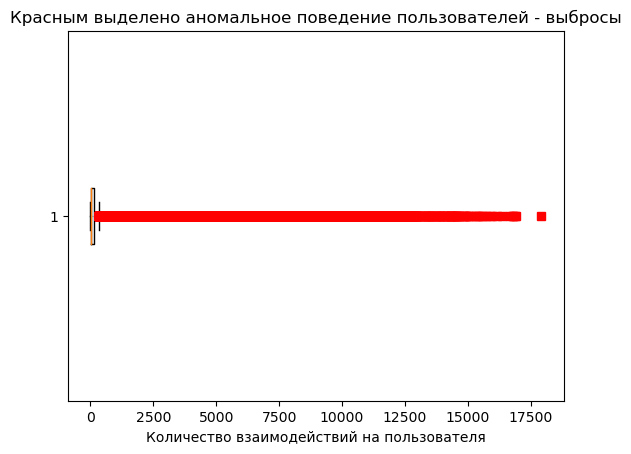

In [20]:
plt.boxplot(df_train['user_id'].value_counts().to_list(), 0, 'rs', 0)
plt.xlabel('Количество взаимодействий на пользователя')
plt.title('Красным выделено аномальное поведение пользователей - выбросы')
plt.show();

In [22]:
print(f"Значения медианы {np.median(df_train['user_id'].value_counts().to_list())} и среднего {np.mean(df_train['user_id'].value_counts().to_list())} подтверждают наличие скошенного распределения в право и наличие выбросов с аномальными значениями")
print(f"Значения стандартного отклонения {np.std(df_train['user_id'].value_counts().to_list())} и дисперсии {np.var(df_train['user_id'].value_counts().to_list())}, также указывают на неоднородность поведения пользователей.")
print(f"При этом до 90% пользователей взаимодействовали с обучающей платформой до {np.quantile(df_train['user_id'].value_counts().to_list(),0.90)} раз.")
print(f"Максимальное {df_train['user_id'].value_counts().iloc[0]} и минимальное {df_train['user_id'].value_counts().iloc[-1]} количество взаимдействий пользователя")

Значения медианы 41.0 и среднего 257.1826128536166 подтверждают наличие скошенного распределения в право и наличие выбросов с аномальными значениями
Значения стандартного отклонения 747.0241359855696 и дисперсии 558045.0597449868, также указывают на неоднородность поведения пользователей.
При этом до 90% пользователей взаимодействовали с обучающей платформой до 591.0 раз.
Максимальное 17917 и минимальное 1 количество взаимдействий пользователя


Для объективной оценки неообходимо разделить на группы пользователей и исследовать по отдельности. Но это в предмет задания не входит.

In [24]:
# Исследуем 	content_id
# Идентификационный код для взаимодействия с пользователем
print(f'Уникальных идентификационных кодов для взаимодействия с пользователем: {len(df_train["content_id"].unique())}')
print(f"Среднее количество взаимодействий с пользователеми по идентификационному коду: {len(df_train['user_id'].unique())/len(df_train['content_id'].unique())}")

Уникальных идентификационных кодов для взаимодействия с пользователем: 13782
Среднее количество взаимодействий с пользователеми по идентификационному коду: 28.072485851110144


In [25]:
print(f"Значения медианы {np.median(df_train['content_id'].value_counts().to_list())} и среднего {np.mean(df_train['content_id'].value_counts().to_list())} подтверждают наличие скошенного распределения в право и наличие выбросов с аномальными значениями")
print(f"Значения стандартного отклонения {np.std(df_train['content_id'].value_counts().to_list())} и дисперсии {np.var(df_train['content_id'].value_counts().to_list())}, также указывают на неоднородность поведения пользователей.")
print(f"При этом до 90% пользователей взаимодействовали с обучающей платформой до {np.quantile(df_train['content_id'].value_counts().to_list(),0.90)} раз.")
print(f"Максимальное {df_train['content_id'].value_counts().iloc[0]} и минимальное {df_train['content_id'].value_counts().iloc[-1]} количество взаимдействий пользователя")

Значения медианы 4648.0 и среднего 7219.755260484691 подтверждают наличие скошенного распределения в право и наличие выбросов с аномальными значениями
Значения стандартного отклонения 11219.289992371145 и дисперсии 125872467.93291931, также указывают на неоднородность поведения пользователей.
При этом до 90% пользователей взаимодействовали с обучающей платформой до 15719.599999999999 раз.
Максимальное 209976 и минимальное 1 количество взаимдействий пользователя


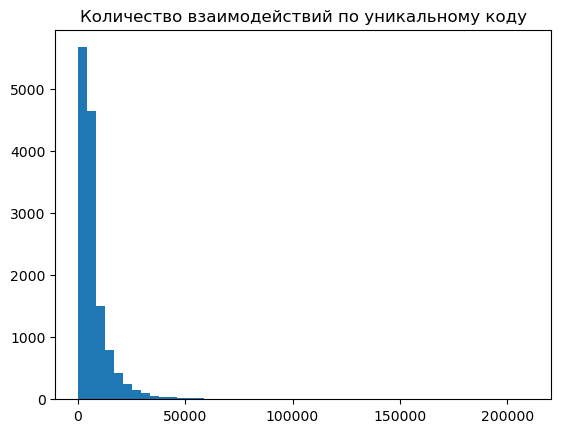

In [26]:
plt.hist(df_train['content_id'].value_counts().to_list(), bins=50)
plt.title('Количество взаимодействий по уникальному коду')
plt.show();

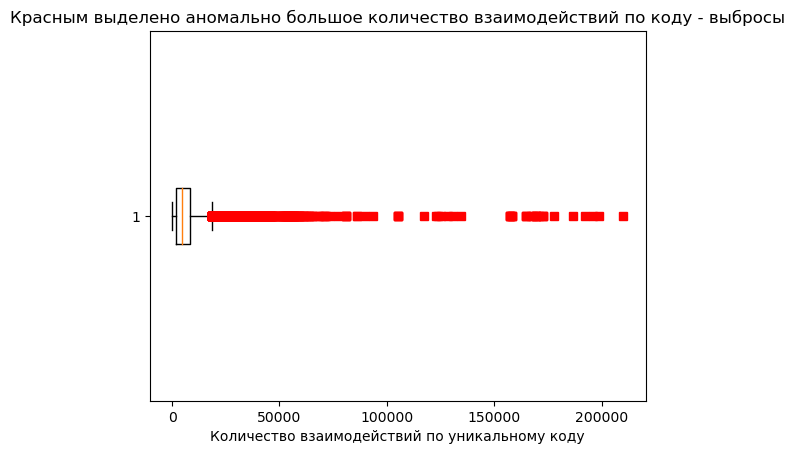

In [28]:
plt.boxplot(df_train['content_id'].value_counts().to_list(), 0, 'rs', 0)
plt.xlabel('Количество взаимодействий по уникальному коду')
plt.title('Красным выделено аномально большое количество взаимодействий по коду - выбросы')
plt.show();

In [90]:
# Исследуем 	content_type_id
# 0, если событием был вопрос, заданный пользователю, 1, если событием был просмотр пользователем лекции False=0,True=1
df_train.content_type_id.value_counts(normalize=True)

0    0.980635
1    0.019365
Name: content_type_id, dtype: float64

Видно, что в данном поле содержатся в основном сведения о событии: вопрос пользователю (98% от общего количества записей).  Также можно предположить, что после просмотра лекции - (2% от общего количества записей), пользователю задовались вопросы. Т.е. в фрейме содержатся в основном записи о результатах ответа на вопросы.

## Далее посмотрим на отдельные показатели и постараемся найти различного рода зависимости

In [93]:
df_train[df_train['target'] == 1]['prior_question_had_explanation'].mean(), df_train[(df_train['content_type_id'] == 0)&df_train['target'] == 1]['prior_question_had_explanation'].mean()

(0.9292077835253136, 0.9292077835253136)

In [92]:
df_train[df_train['target'] == 0]['prior_question_had_explanation'].mean(), df_train[(df_train['content_type_id'] == 0)& df_train['target'] == 0]['prior_question_had_explanation'].mean()

(0.8646496036466275, 0.8173909646950912)

In [32]:
df_train[df_train['target'] == 1]['timestamp'].median()

2873000.0

In [34]:
df_train[df_train['target'] == 1]['timestamp'].mean()

7945655.515617425

In [33]:
df_train[df_train['target'] == 0]['timestamp'].median()

2265726.5

In [35]:
df_train[df_train['target'] == 0]['timestamp'].mean()

7237418.606170726

<Axes: >

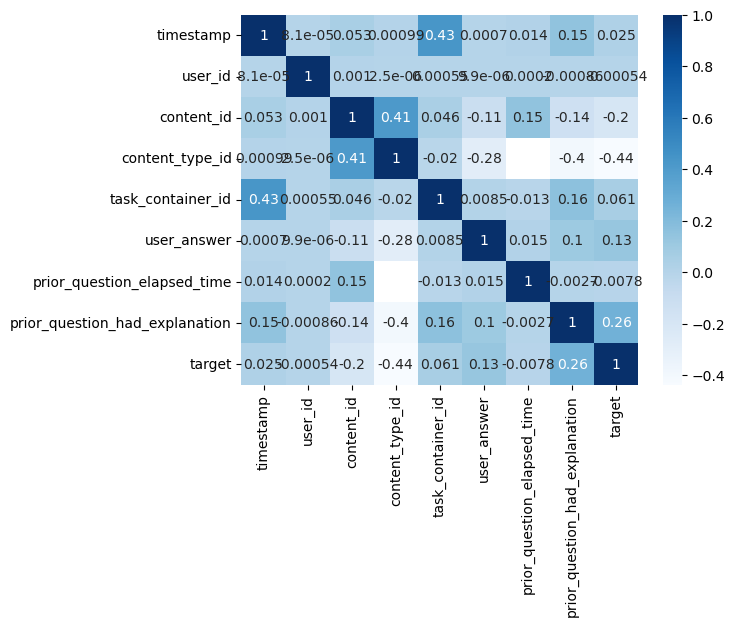

In [37]:
# Тепловая карта корреляции признаков
corr = df_train.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

### Подведем промежуточный итог
Явной линейной зависимости между признаками нет. Для выявления закономерностей неообходимо использование бустинговых моделей для выявления нелинейных связей т.к. они могут строить нелинейную разделяющую поверхность. Также могут, что-то найти полиномиальные функции. Но в предмет задания это не входит.  

Также здесь нужно проводить инжиниринг данных. Так как из распределений видно, что разные пользователи по разному отвечают, тратят на это разное количество времени и используют разное количество попыток.
Дополнительно можно соеденить данные из фрейма с вопросами и лекциями, добавивив категориальных признаков и векторов.

### Далее также можно изучать фрейм в разрезе взаимодействия пользователя с платформой.
Но учитывая, что в курсе еще не проходили соединение фреймов, построение сводных таблиц и моделей и отбор фичей с помощью моделей. Я только покажу целесообразность такого анализа.

In [94]:
# Сводная тадлица
all_pivot = (df_train[df_train['content_type_id'] == 0].pivot_table(index=['user_id'],
                      values=['timestamp', 'content_id',
                                'content_type_id',
                                 'task_container_id',
                                 'user_answer',
                                 'prior_question_elapsed_time',
                                 'prior_question_had_explanation',
                                 'target'],
                     aggfunc=('median', 'mean', 'count'))).reset_index()#.sort_values(by=['target'], ascending=False)

In [95]:
all_pivot

user_id content_id                      content_type_id       \
                        count         mean  median           count mean   
0              115         46  3598.173913  2064.5              46  0.0   
1              124         30  4620.366667  4306.0              30  0.0   
2             2746         19  1656.157895   714.0              19  0.0   
3             5382        125  4854.408000  4993.0             125  0.0   
4             8623        109  4368.596330  4078.0             109  0.0   
...            ...        ...          ...     ...             ...  ...   
386890  2111581839         30  4620.366667  4306.0              30  0.0   
386891  2111584081         30  4620.366667  4306.0              30  0.0   
386892  2111591053         29  4335.896552  4253.0              29  0.0   
386893  2111592992         66  4334.757576  4532.0              66  0.0   
386894  2111604479        589  4395.008489  3731.0             589  0.0   

              prior_question_elapsed_time                    ... target  \
       median                       count       mean median  ... median   
0         0.0                          45  19.911111   20.0  ...    1.0   
1         0.0                          29  18.724138   21.0  ...    0.0   
2         0.0                          18  18.055556   17.5  ...    1.0   
3         0.0                         124  36.048387   25.0  ...    1.0   
4         0.0                         108  26.092593   20.0  ...    1.0   
...       ...                         ...        ...    ...  ...    ...   
386890    0.0                          29  42.793103   46.0  ...    0.0   
386891    0.0                          29  25.034483   23.0  ...    1.0   
386892    0.0                          28  22.857143   16.0  ...    1.0   
386893    0.0                          65  15.523077   16.0  ...    1.0   
386894    0.0                         588  28.285714   24.0  ...    1.0   

       task_container_id                    timestamp                 \
                   count        mean median     count           mean   
0                     46   22.239130   22.5        46  102124.739130   
1                     30    8.366667    7.0        30     367.933333   
2                     19    9.263158    9.0        19     368.947368   
3                    125   63.056000   63.0       125  366373.648000   
4                    109   48.311927   45.0       109  344818.036697   
...                  ...         ...    ...       ...            ...   
386890                30    8.366667    7.0        30     815.833333   
386891                30    8.366667    7.0        30   68737.133333   
386892                29   14.000000   14.0        29     393.793103   
386893                66   32.500000   32.5        66    1919.636364   
386894               589  226.061121  209.0       589  350024.174873   

                 user_answer                   
          median       count      mean median  
0          546.0          46  1.565217    2.0  
1          383.0          30  1.633333    2.0  
2          329.0          19  1.684211    3.0  
3       300851.0         125  1.376000    1.0  
4       342655.0         109  1.394495    1.0  
...          ...         ...       ...    ...  
386890     860.0          30  1.466667    1.5  
386891   89498.0          30  1.933333    2.0  
386892     402.0          29  1.275862    1.0  
386893    1949.5          66  1.181818    1.0  
386894  196068.0         589  1.351443    1.0  

[386895 rows x 25 columns]

Из сводной таблицы видно, что пользователи имели разное количество взаимодействий с системой и по разному с ней взаимодействовали. И в итоге получили разное соотношение правильных и не правильных ответов.

In [51]:
# Можно посомтреть на различные показатели в разрезе целевого признака и пользователя.
all_pivot_target = (df_train.pivot_table(index=['user_id', 'target'],
                      values=['timestamp', 'content_id',
                                'content_type_id',
                                 'task_container_id',
                                 'user_answer',
                                 'prior_question_elapsed_time',
                                 'prior_question_had_explanation'],
                     aggfunc=('median', 'mean', 'count'))).reset_index()#.sort_values(by=['target'], ascending=False)

In [57]:
all_pivot_target

user_id target content_id                        content_type_id  \
                               count          mean   median           count   
0              115      0         14   2391.928571    184.0              14   
1              115      1         32   4125.906250   4528.0              32   
2              124      0         23   4778.434783   4492.0              23   
3              124      1          7   4101.000000   2947.0               7   
4             2746     -1          1   6808.000000   6808.0               1   
...            ...    ...        ...           ...      ...             ...   
920479  2111592992      0         13   5624.923077   5811.0              13   
920480  2111592992      1         53   4018.301887   4093.0              53   
920481  2111604479     -1         17  18274.352941  18307.0              17   
920482  2111604479      0        160   4992.843750   5876.5             160   
920483  2111604479      1        429   4172.039627   3146.0             429   

                   prior_question_elapsed_time             ...  \
       mean median                       count       mean  ...   
0       0.0    0.0                          14  19.357143  ...   
1       0.0    0.0                          31  20.161290  ...   
2       0.0    0.0                          23  18.217391  ...   
3       0.0    0.0                           6  20.666667  ...   
4       1.0    1.0                           0        NaN  ...   
...     ...    ...                         ...        ...  ...   
920479  0.0    0.0                          13  15.461538  ...   
920480  0.0    0.0                          52  15.538462  ...   
920481  1.0    1.0                           0        NaN  ...   
920482  0.0    0.0                         160  30.512500  ...   
920483  0.0    0.0                         428  27.453271  ...   

       prior_question_had_explanation task_container_id                     \
                               median             count        mean median   
0                                 0.0                14   25.285714   22.5   
1                                 0.0                32   20.906250   21.5   
2                                 0.0                23    9.000000    8.0   
3                                 0.0                 7    6.285714    6.0   
4                                 0.0                 1   14.000000   14.0   
...                               ...               ...         ...    ...   
920479                            1.0                13   32.307692   27.0   
920480                            1.0                53   32.547170   33.0   
920481                            0.0                17  279.235294  327.0   
920482                            1.0               160  241.943750  221.0   
920483                            1.0               429  220.137529  204.0   

       timestamp                          user_answer                   
           count           mean    median       count      mean median  
0             14  143591.785714     546.0          14  1.642857    1.5  
1             32   83982.906250     522.0          32  1.531250    2.0  
2             23     392.434783     419.0          23  1.782609    2.0  
3              7     287.428571     331.0           7  1.142857    1.0  
4              1     654.000000     654.0           1 -1.000000   -1.0  
...          ...            ...       ...         ...       ...    ...  
920479        13    2013.076923    1843.0          13  1.000000    1.0  
920480        53    1896.716981    1959.0          53  1.226415    1.0  
920481        17  506339.058824  721185.0          17 -1.000000   -1.0  
920482       160  383987.650000  201957.5         160  1.362500    1.0  
920483       429  337357.144522  194684.0         429  1.347319    1.0  

[920484 rows x 23 columns]

In [98]:
all_pivot_target = (df_train[df_train['content_type_id'] == 0].pivot_table(index=['user_id', 'target'],
                      values=['timestamp', 'content_id',
                                'content_type_id',
                                 'task_container_id',
                                 'user_answer',
                                 'prior_question_elapsed_time',
                                 'prior_question_had_explanation'],
                     aggfunc=('median', 'mean', 'count'))).reset_index()#.sort_values(by=['target'], ascending=False)

In [99]:
all_pivot_target

user_id target content_id                      content_type_id  \
                               count         mean  median           count   
0              115      0         14  2391.928571   184.0              14   
1              115      1         32  4125.906250  4528.0              32   
2              124      0         23  4778.434783  4492.0              23   
3              124      1          7  4101.000000  2947.0               7   
4             2746      0          8  1909.000000   775.0               8   
...            ...    ...        ...          ...     ...             ...   
773393  2111591053      1         19  4469.526316  4253.0              19   
773394  2111592992      0         13  5624.923077  5811.0              13   
773395  2111592992      1         53  4018.301887  4093.0              53   
773396  2111604479      0        160  4992.843750  5876.5             160   
773397  2111604479      1        429  4172.039627  3146.0             429   

                   prior_question_elapsed_time             ...  \
       mean median                       count       mean  ...   
0       0.0    0.0                          14  19.357143  ...   
1       0.0    0.0                          31  20.161290  ...   
2       0.0    0.0                          23  18.217391  ...   
3       0.0    0.0                           6  20.666667  ...   
4       0.0    0.0                           7  18.571429  ...   
...     ...    ...                         ...        ...  ...   
773393  0.0    0.0                          19  26.947368  ...   
773394  0.0    0.0                          13  15.461538  ...   
773395  0.0    0.0                          52  15.538462  ...   
773396  0.0    0.0                         160  30.512500  ...   
773397  0.0    0.0                         428  27.453271  ...   

       prior_question_had_explanation task_container_id                     \
                               median             count        mean median   
0                                 0.0                14   25.285714   22.5   
1                                 0.0                32   20.906250   21.5   
2                                 0.0                23    9.000000    8.0   
3                                 0.0                 7    6.285714    6.0   
4                                 1.0                 8    7.750000    6.5   
...                               ...               ...         ...    ...   
773393                            1.0                19   14.473684   14.0   
773394                            1.0                13   32.307692   27.0   
773395                            1.0                53   32.547170   33.0   
773396                            1.0               160  241.943750  221.0   
773397                            1.0               429  220.137529  204.0   

       timestamp                          user_answer                   
           count           mean    median       count      mean median  
0             14  143591.785714     546.0          14  1.642857    1.5  
1             32   83982.906250     522.0          32  1.531250    2.0  
2             23     392.434783     419.0          23  1.782609    2.0  
3              7     287.428571     331.0           7  1.142857    1.0  
4              8     303.125000     210.5           8  1.625000    2.0  
...          ...            ...       ...         ...       ...    ...  
773393        19     409.578947     402.0          19  1.368421    2.0  
773394        13    2013.076923    1843.0          13  1.000000    1.0  
773395        53    1896.716981    1959.0          53  1.226415    1.0  
773396       160  383987.650000  201957.5         160  1.362500    1.0  
773397       429  337357.144522  194684.0         429  1.347319    1.0  

[773398 rows x 23 columns]

In [101]:
check_corr_method(all_pivot_target[all_pivot_target['target']!=-1], 'kendall')

C:\Users\ipd08\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5283: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


target                                    1.000000
prior_question_had_explanation  median    0.095388
                                mean      0.083683
user_answer                     mean      0.043056
task_container_id               median    0.036315
timestamp                       median    0.034002
content_type_id                 count     0.022898
content_id                      count     0.022898
task_container_id               count     0.022898
timestamp                       count     0.022898
user_answer                     count     0.022898
prior_question_elapsed_time     count     0.016002
prior_question_had_explanation  count     0.016002
task_container_id               mean      0.012835
timestamp                       mean      0.005332
user_id                                  -0.000012
prior_question_elapsed_time     mean     -0.026597
content_id                      median   -0.032833
prior_question_elapsed_time     median   -0.040343
content_id                     

In [103]:
check_corr_method(all_pivot_target[all_pivot_target['target']!=-1], 'spearman', num=0)

C:\Users\ipd08\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target                                    1.000000
prior_question_had_explanation  mean      0.100549
                                median    0.096658
user_answer                     median    0.078288
                                mean      0.052588
task_container_id               median    0.044149
timestamp                       median    0.041641
task_container_id               count     0.027833
user_answer                     count     0.027833
content_id                      count     0.027833
content_type_id                 count     0.027833
timestamp                       count     0.027833
prior_question_elapsed_time     count     0.019450
prior_question_had_explanation  count     0.019450
task_container_id               mean      0.015715
timestamp                       mean      0.006531
user_id                                  -0.000014
prior_question_elapsed_time     mean     -0.032568
content_id                      median   -0.040173
prior_question_elapsed_time    

## Итог
К сожалению линейной зависомтси между признаками нет. Нам смогут помочь, только оценка признаков с SHAP https://habr.com/ru/articles/428213/

## Ознакомимся с фреймом Вопросов

In [84]:
info_question = { 'question_id': 'внешний ключ для столбца train/ test content_id, когда тип содержимого - question (0). = foreign key for the train/test content_id column, when the content type is question (0).', 
                 'bundle_id': 'код, для которого вопросы подаются вместе. = code for which questions are served together.',
                 'correct_answer': 'ответ на вопрос. Можно сравнить со столбцом train user_answer, чтобы проверить, был ли пользователь прав. = the answer to the question. Can be compared with the train user_answer column to check if the user was right.',
                 'part': 'соответствующий раздел теста TOEIC. = the relevant section of the TOEIC test.', 
                 'tags': 'один или несколько подробных кодов тегов для вопроса. Значение тегов указано не будет, но этих кодов достаточно для объединения вопросов в группу. = one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.'}

In [85]:
# Импортируем самый большой файл
df_questions = pd.read_csv('questions.csv')
df_questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [86]:
# 
info_uniq_values(df_questions, info_question)

***
Поле: question_id: внешний ключ для столбца train/ test content_id, когда тип содержимого - question (0). = foreign key for the train/test content_id column, when the content type is question (0).
Количество уникальных значений: 13523
Количество дублей в поле: 0
Среднее количество записей на уникальное значение: 1.0
Описание самого распредедления поля: count    13523.00000
mean      6761.00000
std       3903.89818
min          0.00000
25%       3380.50000
50%       6761.00000
75%      10141.50000
max      13522.00000
Name: question_id, dtype: float64
Распределения уникальных: Значения медианы:1.0 и среднего:1.0, квантили 25%:1.0, 75%: 1.0.
Распределения уникальных: Значения стандартного отклонения:0.0 и дисперсии:0.0.
Распределения уникальных: Максимальное: 1 и минимальное: 1 значение

***
Поле: bundle_id: код, для которого вопросы подаются вместе. = code for which questions are served together.
Количество уникальных значений: 9765
Количество дублей в поле: 3758
Среднее количество 

## Ознакомимся с фреймом Лекций

In [87]:
info_lectures = {'lecture_id': 'внешний ключ для столбца train/ test content_id, когда тип контента - lecture (1). = foreign key for the train/test content_id column, when the content type is lecture (1).',
                'part': 'код категории верхнего уровня для лекции. = top level category code for the lecture.',
                'tag': 'один из тегов содержит коды для лекции. Значение тегов не будет указано, но этих кодов достаточно для объединения лекций в группы. = one tag codes for the lecture. The meaning of the tags will not be provided, but these codes are sufficient for clustering the lectures together.',
                'type_of': 'краткое описание основной цели лекции. = brief description of the core purpose of the lecture.'}

In [88]:
# Импортируем самый большой файл
df_lectures = pd.read_csv('lectures.csv')
df_lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [134]:
df_lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [89]:
# 
info_uniq_values(df_lectures, info_lectures)

***
Поле: lecture_id: внешний ключ для столбца train/ test content_id, когда тип контента - lecture (1). = foreign key for the train/test content_id column, when the content type is lecture (1).
Количество уникальных значений: 418
Количество дублей в поле: 0
Среднее количество записей на уникальное значение: 1.0
Описание самого распредедления поля: count      418.000000
mean     16983.401914
std       9426.164660
min         89.000000
25%       9026.250000
50%      17161.500000
75%      24906.250000
max      32736.000000
Name: lecture_id, dtype: float64
Распределения уникальных: Значения медианы:1.0 и среднего:1.0, квантили 25%:1.0, 75%: 1.0.
Распределения уникальных: Значения стандартного отклонения:0.0 и дисперсии:0.0.
Распределения уникальных: Максимальное: 1 и минимальное: 1 значение

***
Поле: tag: один из тегов содержит коды для лекции. Значение тегов не будет указано, но этих кодов достаточно для объединения лекций в группы. = one tag codes for the lecture. The meaning of the ta

В дополнительных фреймах содержатся дополнительные таблицы из архитектуры базы данных с дополнительными признаками харктеризующими, какие вопросы из тысяч групп задавались и какие виды лекцией читались.